## Chapter 5
# Filtering

### Determining the frequency response experimentally

We can determine the frequency response of a filter experimentally by running sine waves with a bunch of different frequencies through it.

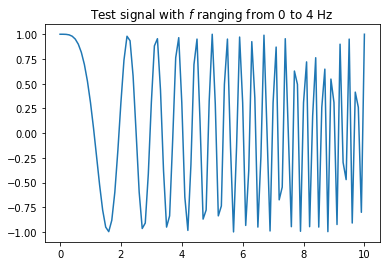

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import chirp

%matplotlib inline

t = np.linspace(0, 10, 101)
x = chirp(t, f0=0, f1=4, t1=10)
plt.plot(t, x)
_ = plt.title('Test signal with $f$ ranging from 0 to 4 Hz')

Consider this simple filter:

$y(n) = x(n) + x(n - 1)$

In [2]:
def simple_lowpass_filter(x):
    return (x + np.roll(x, 1))[1:]

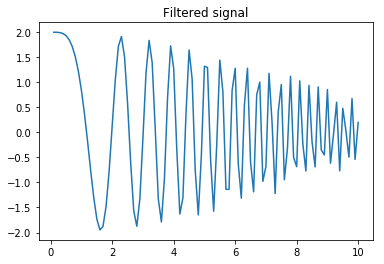

In [3]:
y = simple_lowpass_filter(x)
plt.plot(t[1:], y)
_ = plt.title('Filtered signal')

Notice this filter reduces the magnitude of the higher frequency samples and increases the magnitude of the lower frequency samples.

We can verify this by comparing the spectrum of the filtered signal with that of the original signal:

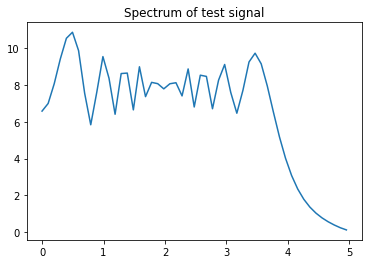

In [4]:
spectrum = np.abs(np.fft.rfft(x))
plt.plot(np.fft.rfftfreq(x.size, d=1/t.max()), spectrum)
_ = plt.title('Spectrum of test signal')

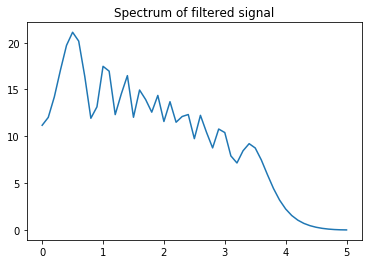

In [5]:
spectrum = np.abs(np.fft.rfft(y))
plt.plot(np.fft.rfftfreq(y.size, d=1/t.max()), spectrum)
_ = plt.title('Spectrum of filtered signal')

### Determining the Frequency Response Analytically

The book derives an analytical solution to a frequency-dependent function of a scaling coefficient for the above rolling 1-back additive filter.  I won't reproduce it here, but the result is the following:

$y(\cdot) = (1 + e^{-i\omega T})x(\cdot)$

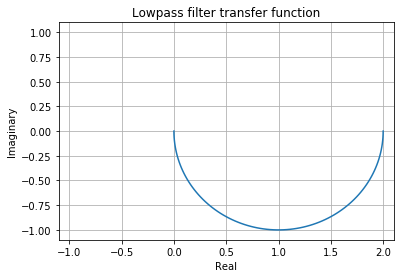

In [6]:
# Nyquist frequency is 1/2 sampling rate T = 1
scaling_coefficient_f_range = np.linspace(0, np.pi, 100)
scaling_coefficients = 1 + np.exp(-1j * scaling_coefficient_f_range)
plt.title('Lowpass filter transfer function')
plt.plot(scaling_coefficients.real, scaling_coefficients.imag)
plt.grid()
plt.xlabel('Real')
plt.ylabel('Imaginary')
_ = plt.axis([-1.1, 2.1, -1.1, 1.1])

The complex values here are not particularly intuitive.  What we really to know is _**the frequency-dependent gain attribute of the transfer function**_, and _**the frequency-dependent delay attribute of the transfer function**_.

We can split the transfer function $H(e^{i\omega T})$ into its magnitude and phase components:

Magnitude of transfer function: $G(\omega) \equiv \left|H(e^{i\omega T})\right|$

Phase of transfer function: $\Theta(\omega) \equiv \angle H(e^{i\omega T})$

Then we can write

$H(e^{i\omega T}) = G(\omega)e^{i\Theta(\omega)}$.

Again, omitting the details of the derivation, for our simple lowpass filter can be shown to have a frequency response of

$G(\omega) = 2\cos{\frac{\omega T}{2}}, -\pi \leq \omega \leq \pi$,

and a phase response of

$\Theta(\omega) = -\frac{\omega T}{2}, -\pi \leq \omega \leq \pi$.

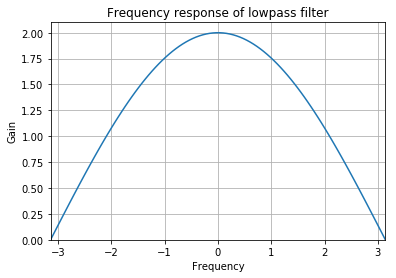

In [7]:
frequency_response_range = np.linspace(-np.pi, np.pi, 100)
plt.title('Frequency response of lowpass filter')
plt.xlabel('Frequency')
plt.ylabel('Gain')
plt.axis([-np.pi, np.pi, 0, 2.1])
plt.grid()
_ = plt.plot(frequency_response_range, 2 * np.cos(frequency_response_range / 2))

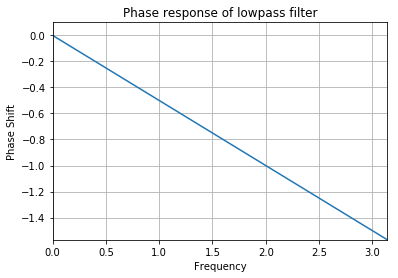

In [8]:
frequency_response_range = np.linspace(0, np.pi, 50)
plt.title('Phase response of lowpass filter')
plt.xlabel('Frequency')
plt.ylabel('Phase Shift')
plt.axis([0, np.pi, -np.pi / 2, 0.1])
plt.grid()
_ = plt.plot(frequency_response_range, -frequency_response_range / 2)

### Z Transform of the unit Step Function

The "Z transform" of a time domain signal is its complex spectrum defined not just for phasor values along the complex unit circle, but for any complex value $z$.

To understand IIR filter frequency response, we can look at the Z transform of the unit step function:

$u(n) = \begin{cases}
    0, & n < 0.\\
    1, & n \geq 0.
\end{cases}$

The unit step function is equivalent to the output of a simple first-order IIR filter with unity gain driven with a single impulse.

Its one-sided Z transform is:

$X(z) = \sum_\limits{n=0}^\limits{\infty}{1\cdot z^{-n}} = \frac{1}{1-z^{-1}}$, $\left|z\right| > 1$.

_(The derivation can be found in the book.)_

By multiplying the numerator and denominator by $z$, we can write this as

$X(z) = \frac{z}{z-1}$, $\left|z\right| > 1$.

In [9]:
def unit_step_z_transform(z):
    return z / (z - 1)

The following chart emulates Figure 5.19 in the book:

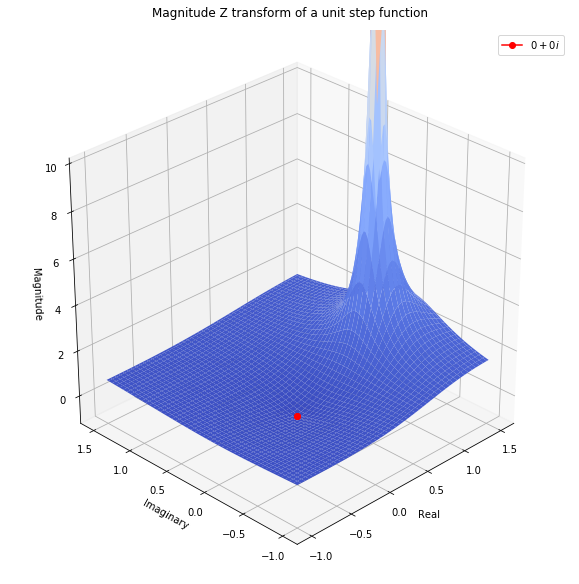

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np


fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

real = np.linspace(-1, 1.5, 100)
imag = np.linspace(-1, 1.5, 100)
real, imag = np.meshgrid(real, imag)
r = np.sqrt(real**2 + imag**2)
a = np.arctan2(real, imag)
z = r * np.exp(1j * a)
X = unit_step_z_transform(z)
ax.plot_surface(z.real, z.imag, np.abs(X), cmap=cm.coolwarm, antialiased=True)
zero_mag = unit_step_z_transform(0j)
ax.set_title('Magnitude Z transform of a unit step function', y=1.1)
ax.plot([0,0], [0,0], [zero_mag.real, zero_mag.imag], c='r', marker='o', label='$0 + 0i$')
ax.legend()
ax.view_init(azim=5 * 360/8)
ax.set_xlabel('Real')
ax.set_ylabel('Imaginary')
ax.set_zlabel('Magnitude')
_ = ax.set_zlim(-1.01, 10)